In [1]:
import numpy as np
import pandas as pd
import logging
import warnings

from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler
from sklearn.metrics import accuracy_score

import matplotlib.pyplot as plt

In [2]:
# Reading the dataset
dataset_path = "/kaggle/input/heart-attack-analysis-prediction-dataset/heart.csv"

try:
    # Attempt to read the dataset
    df = pd.read_csv(dataset_path)
except FileNotFoundError:
    print("Error: Dataset file not found. Please provide the correct file path.")
except Exception as e:
    print(f"An error occurred: {e}")
    
df.head(2)

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1


In [3]:
data_df = df[['output', 'age','sex','cp','fbs','chol']]

df1 = data_df.copy(deep=True)
cat_cols = ['sex','fbs']

label_name = 'output'

# encoding the categorical columns
df1 = pd.get_dummies(df1, columns = cat_cols, drop_first = True)

# defining the features and target
X = df1.drop([label_name],axis=1)
y = df1[['output']]

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 42)
print("The shape of X_train is      ", X_train.shape)
print("The shape of X_test is       ",X_test.shape)
print("The shape of y_train is      ",y_train.shape)
print("The shape of y_test is       ",y_test.shape)

The shape of X_train is       (242, 5)
The shape of X_test is        (61, 5)
The shape of y_train is       (242, 1)
The shape of y_test is        (61, 1)


In [5]:
# Assuming y_train is your target variable
class_counts = y_train.value_counts()

# Print the counts
print("Class 0 count:", class_counts[0])
print("Class 1 count:", class_counts[1])

Class 0 count: 109
Class 1 count: 133


In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

clf = DecisionTreeClassifier(max_depth=3, random_state=0)
clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=0)

In [7]:
n_nodes = clf.tree_.node_count
children_left = clf.tree_.children_left
children_right = clf.tree_.children_right
feature = clf.tree_.feature
threshold = clf.tree_.threshold
values = clf.tree_.value

node_depth = np.zeros(shape=n_nodes, dtype=np.int64)
is_leaves = np.zeros(shape=n_nodes, dtype=bool)
stack = [(0, 0)]  # start with the root node id (0) and its depth (0)
while len(stack) > 0:
    # `pop` ensures each node is only visited once
    node_id, depth = stack.pop()
    node_depth[node_id] = depth

    # If the left and right child of a node is not the same we have a split
    # node
    is_split_node = children_left[node_id] != children_right[node_id]
    # If a split node, append left and right children and depth to `stack`
    # so we can loop through them
    if is_split_node:
        stack.append((children_left[node_id], depth + 1))
        stack.append((children_right[node_id], depth + 1))
    else:
        is_leaves[node_id] = True

print(
    "The binary tree structure has {n} nodes and has "
    "the following tree structure:\n".format(n=n_nodes)
)
for i in range(n_nodes):
    if is_leaves[i]:
        print(
            "{space}node={node} is a leaf node with value={value}.".format(
                space=node_depth[i] * "\t", node=i, value=values[i]
            )
        )
    else:
        print(
            "{space}node={node} is a split node with value={value}: "
            "go to node {left} if X[:, {feature}] <= {threshold} "
            "else to node {right}.".format(
                space=node_depth[i] * "\t",
                node=i,
                left=children_left[i],
                feature=feature[i],
                threshold=threshold[i],
                right=children_right[i],
                value=values[i],
            )
        )

The binary tree structure has 15 nodes and has the following tree structure:

node=0 is a split node with value=[[105. 122.]]: go to node 1 if X[:, 1] <= 0.5 else to node 8.
	node=1 is a split node with value=[[80. 30.]]: go to node 2 if X[:, 3] <= 0.5 else to node 5.
		node=2 is a split node with value=[[15. 15.]]: go to node 3 if X[:, 4] <= 0.5 else to node 4.
			node=3 is a leaf node with value=[[11. 15.]].
			node=4 is a leaf node with value=[[4. 0.]].
		node=5 is a split node with value=[[65. 15.]]: go to node 6 if X[:, 0] <= 49.0 else to node 7.
			node=6 is a leaf node with value=[[11.  6.]].
			node=7 is a leaf node with value=[[54.  9.]].
	node=8 is a split node with value=[[25. 92.]]: go to node 9 if X[:, 3] <= 0.5 else to node 12.
		node=9 is a split node with value=[[ 1. 44.]]: go to node 10 if X[:, 2] <= 318.5 else to node 11.
			node=10 is a leaf node with value=[[ 0. 39.]].
			node=11 is a leaf node with value=[[1. 5.]].
		node=12 is a split node with value=[[24. 48.]]: 

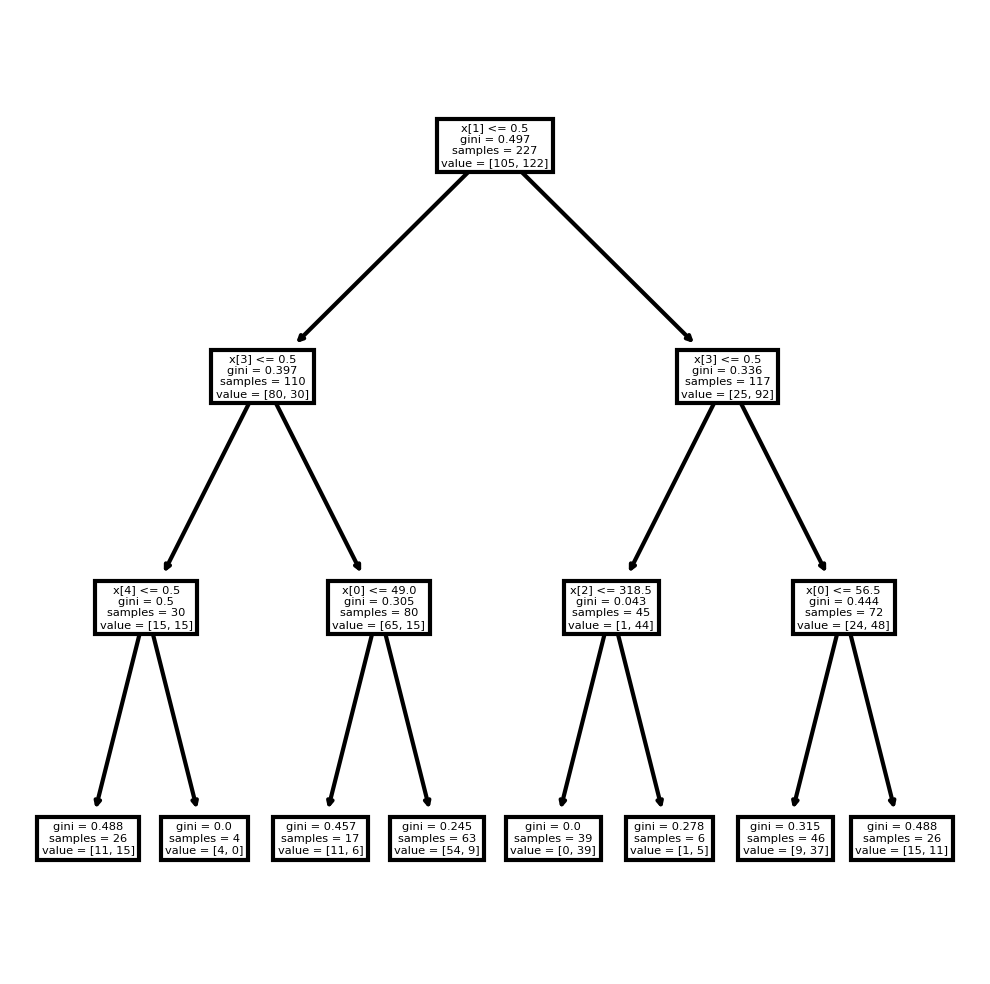

In [8]:
# Plotting the tree
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(4, 4), dpi=300)
plot_tree(clf)
fig.savefig('plottreedefault.png')

In [9]:
score = clf.score(X_test, y_test)
print(score)

0.7368421052631579


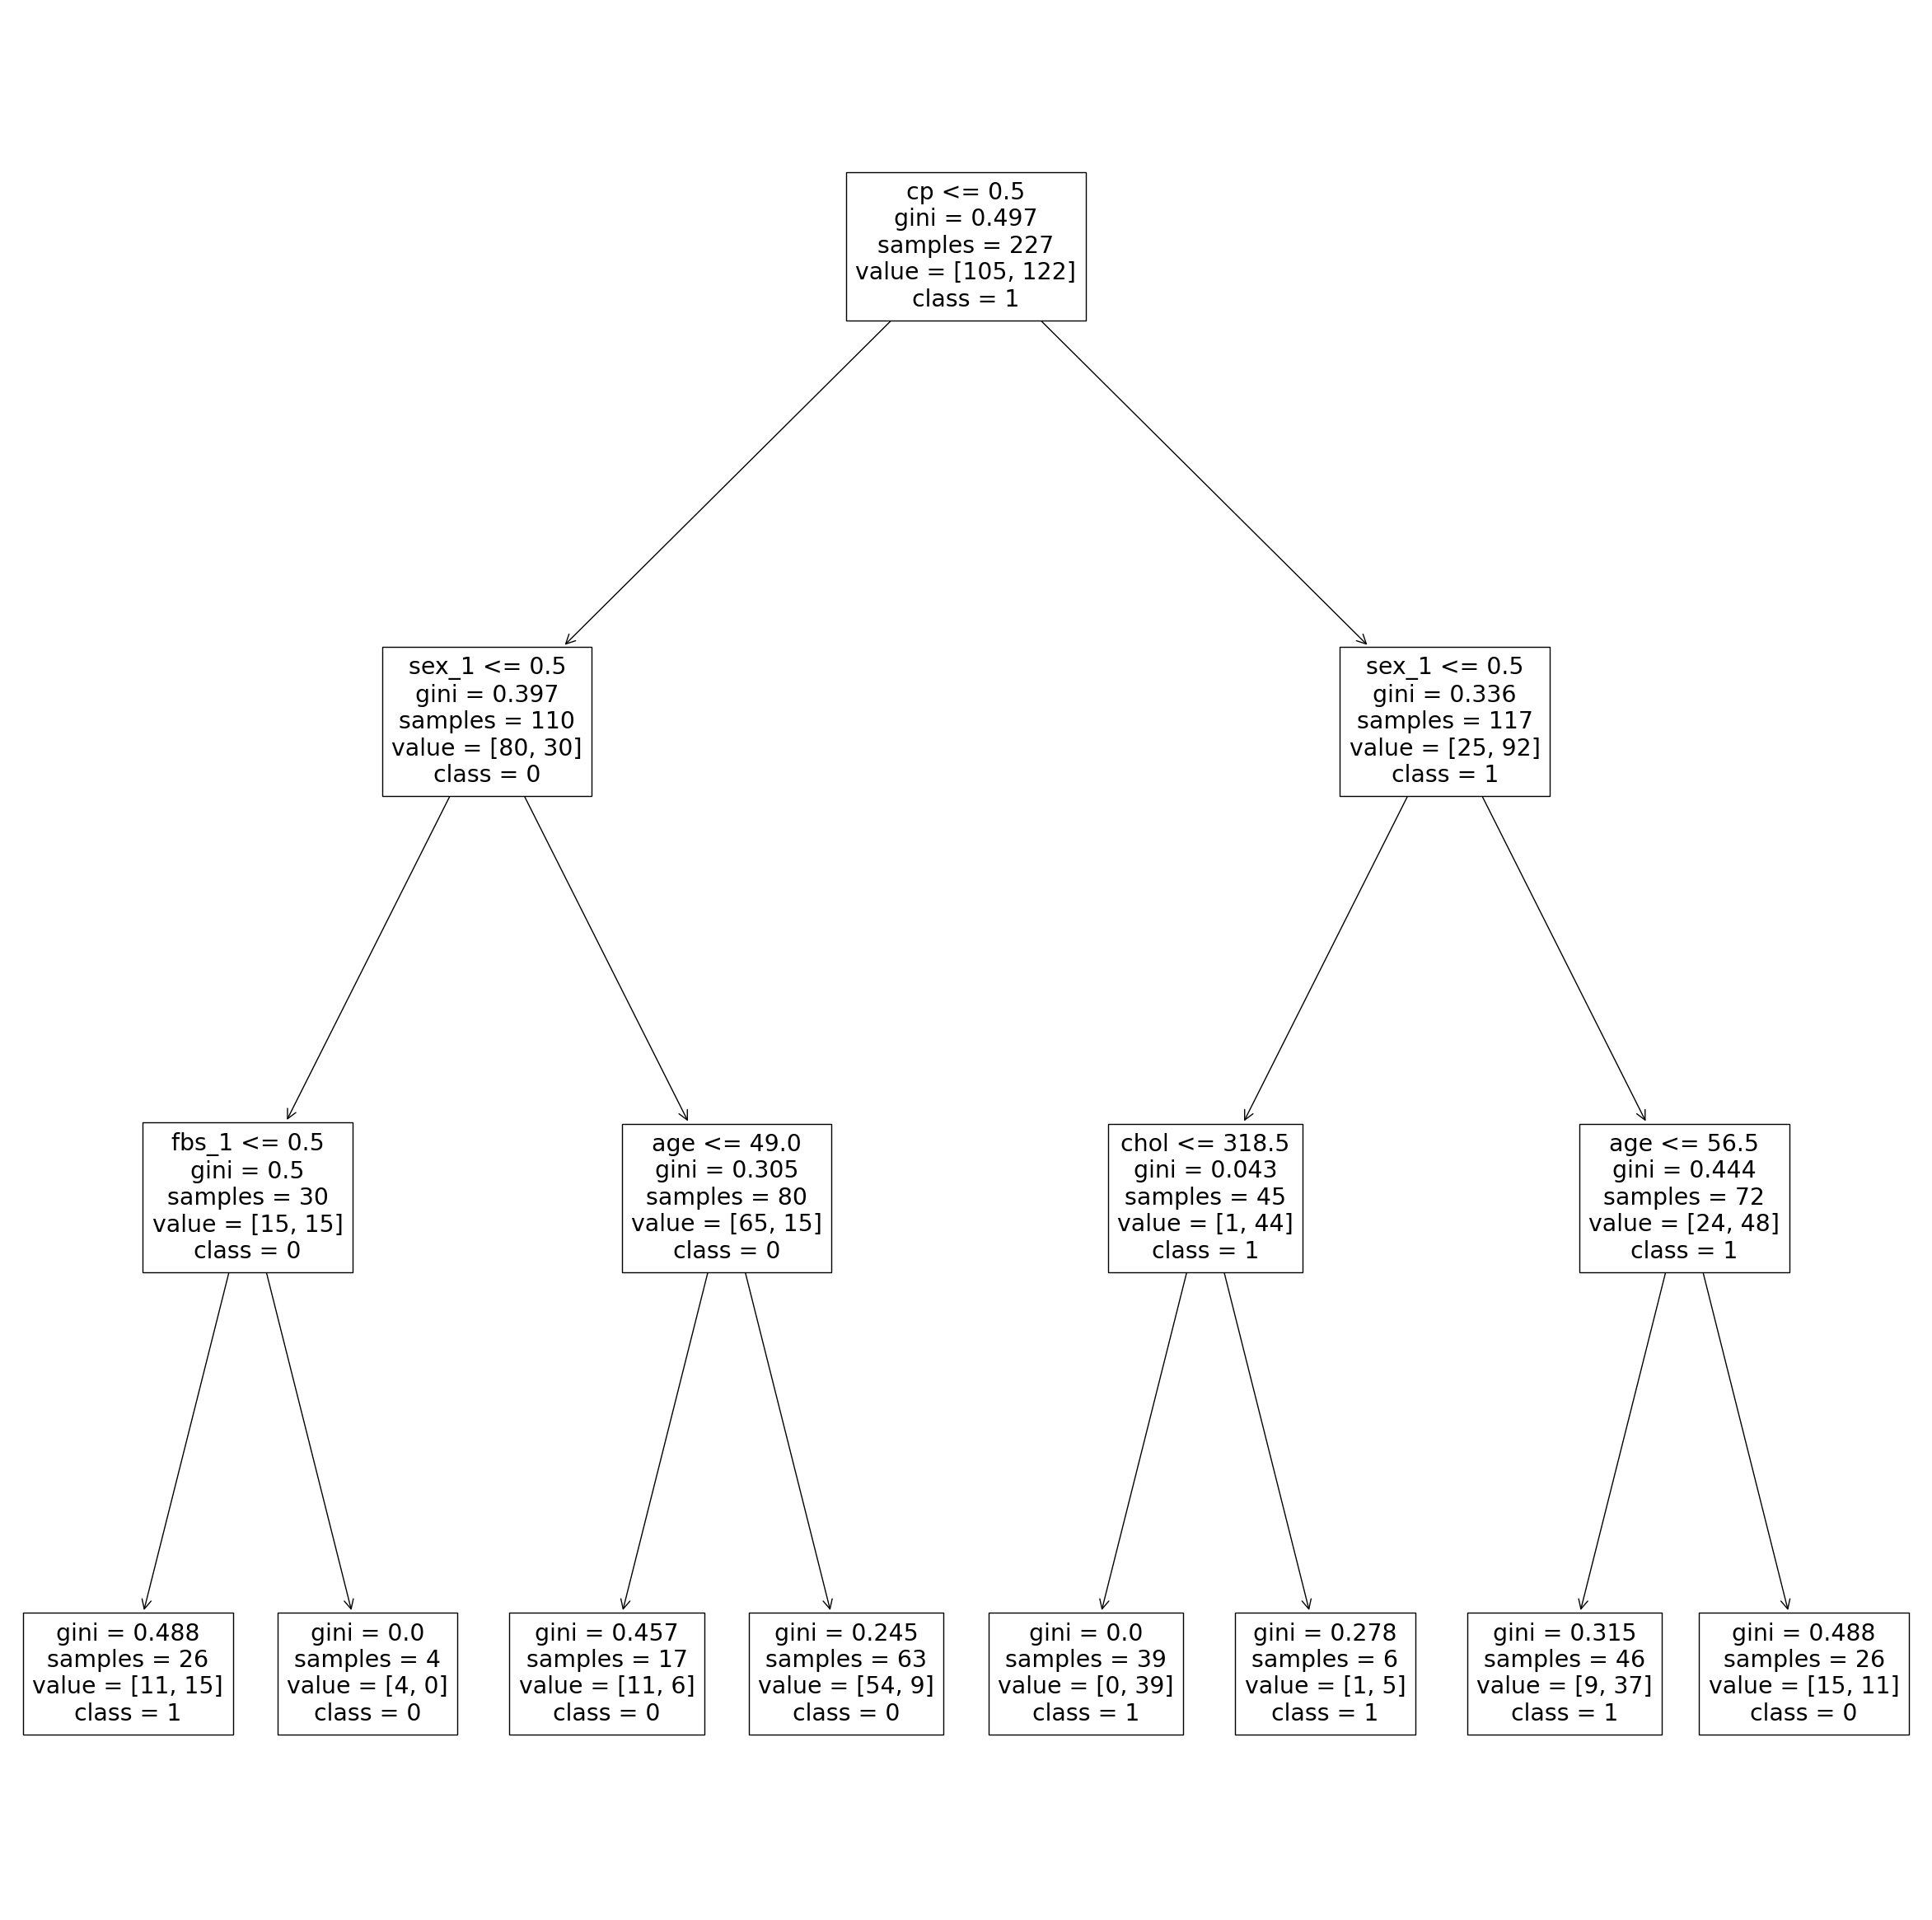

In [10]:
fig = plt.figure(figsize=(30, 30))
_ = plot_tree(
    clf,
    feature_names=df1.drop([label_name], axis=1).columns.to_list(),
    class_names=['0', '1'],
    filled=False
)